In [3]:
from BML.data import Dataset
from BML import utils
import pandas as pd 
#################
# Data collection

folder = "../data/"
dataset = Dataset(folder)

# dataset.setParams({
#     "PrimingPeriod": 10*60, # 10 hours of priming data
#     "IpVersion": [4], # only IPv4 routes
#     "Collectors": ["rrc06"], # rrc06: at Otemachi, Japan 
# })

# dataset.setPeriodsOfInterests([
#     {
#     "name": "GoogleLeak",
#     "label": "anomaly",
#     "start_time": utils.getTimestamp(2017, 8, 25, 3, 0, 0),  # August 25, 2017, 3:00 UTC
#     "end_time": utils.getTimestamp(2017, 8, 25, 4, 0, 0)  # August 25, 2017, 4:00 UTC
#     }
# ])

dataset.setParams({
    "PrimingPeriod": 1*60, # 10 hours of priming data
    "IpVersion": [4], # only IPv4 routes
    "Collectors": ["rrc06"], # rrc06: at Otemachi, Japan 
})

dataset.setPeriodsOfInterests([
    {
    "name": "Indosat",
    "label": "anomaly",
    "start_time": utils.getTimestamp(2014, 4, 2, 16, 0, 0),  # August 25, 2017, 3:00 UTC
    "end_time": utils.getTimestamp(2014, 4, 2, 23, 0, 0)  # August 25, 2017, 4:00 UTC
    }
])

# run the data collection
utils.runJobs(dataset.getJobs(), folder+"collect_jobs") 

################
# Run jobs list 
################
Number of processes to execute: 1
Number of processes in parallel: 1
Processing queue: started
To monitor the execution run: watch -n 1 cat ../data/collect_jobs/queue.log


  0%|          | 0/1 [00:00<?, ?it/s]

Processing queue: finish
Computation time: 0h 0m 1s


In [4]:
import pandas as pd 
data = pd.read_csv(folder+"anomaly/Indosat/data/updates.csv.gz")
data.plot(figsize=(10,10))

ParserError: Error tokenizing data. C error: Expected 10 fields in line 59, saw 12


In [6]:
from BML.transform import DatasetTransformation

# features extraction every minute
datTran = DatasetTransformation(folder, "BML.transform", "Features")

datTran.setParams({
        "global":{
            "Period": 1,
        }
    })

# run the data transformation
utils.runJobs(datTran.getJobs(), folder+"transform_jobs") 

################
# Run jobs list 
################
Number of processes to execute: 1
Number of processes in parallel: 1
Processing queue: started
To monitor the execution run: watch -n 1 cat ../data/transform_jobs/queue.log


  0%|          | 0/1 [00:00<?, ?it/s]

Processing queue: finish
Computation time: 0h 0m 5s


In [ ]:
from BML.transform import DatasetTransformation

# features extraction every minute
datTran = DatasetTransformation(folder, "BML.transform", "Features")

datTran.setParams({
        "global":{
            "Period": 1,
        }
    })

# run the data transformation
utils.runJobs(datTran.getJobs(), folder+"transform_jobs") 

<AxesSubplot: >

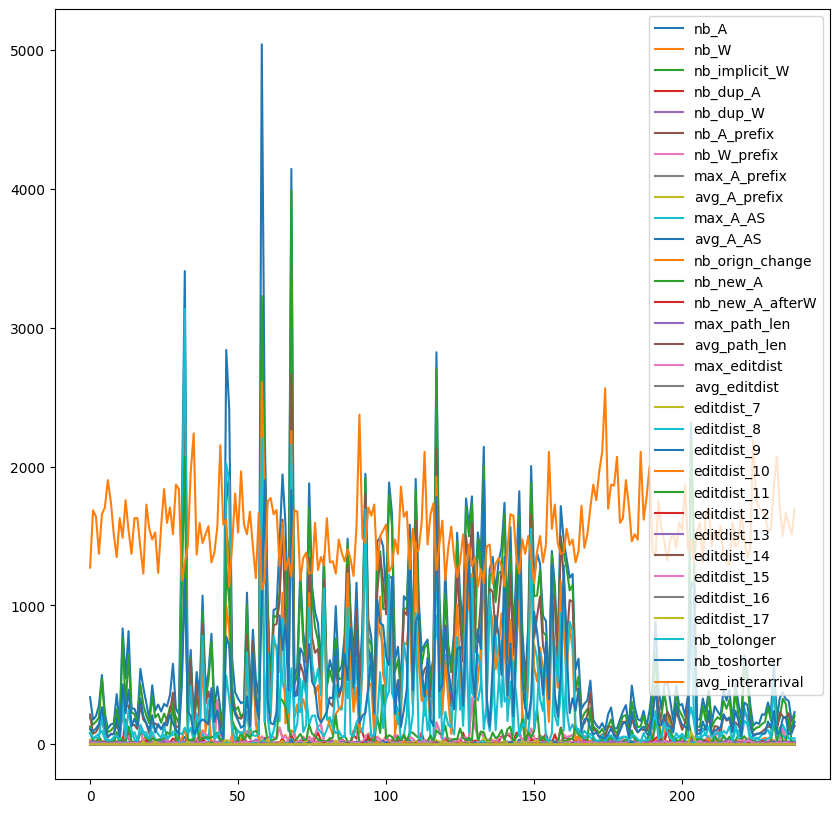

In [13]:

data = pd.read_json(folder+"anomaly/Indosat/transform/Features/Features_1.json")
data.plot(figsize=(10,10))

In [8]:
data

,nb_A,nb_W,nb_implicit_W,nb_dup_A,nb_dup_W,nb_A_prefix,nb_W_prefix,max_A_prefix,avg_A_prefix,max_A_AS,...,editdist_11,editdist_12,editdist_13,editdist_14,editdist_15,editdist_16,editdist_17,nb_tolonger,nb_toshorter,avg_interarrival
0,339,30,191,8,0,214,22,18,2,78,...,0,0,0,0,0,0,0,82,109,1273
1,176,30,142,14,0,76,27,14,2,27,...,0,0,0,0,0,0,0,48,94,1686
2,203,17,163,23,0,89,13,13,2,60,...,1,0,0,0,0,0,0,49,114,1639
3,280,53,193,26,0,128,47,17,2,74,...,6,0,0,0,0,0,0,48,145,1372
4,499,25,473,10,0,174,19,11,3,96,...,0,0,0,0,0,0,0,206,267,1657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,375,113,329,17,0,200,111,17,2,60,...,0,0,0,0,0,0,0,142,187,1500
235,325,25,292,12,0,186,25,16,2,45,...,0,0,1,0,0,0,0,94,198,1667
236,312,15,116,18,0,224,15,15,1,44,...,0,0,0,0,0,0,0,44,72,1583
237,164,15,123,16,0,88,13,23,2,23,...,0,0,0,0,0,0,0,44,79,1514


In [14]:
# graph features extraction every minute
datTran = DatasetTransformation(folder, "BML.transform", "GraphFeatures")

datTran.setParams({
        "global":{
            "Period": 1,
        }
    })

# run the data transformation
utils.runJobs(datTran.getJobs(), folder+"transform_jobs") 

################
# Run jobs list 
################
Number of processes to execute: 1
Number of processes in parallel: 1
Processing queue: started
To monitor the execution run: watch -n 1 cat ../data/transform_jobs/queue.log


  0%|          | 0/1 [00:00<?, ?it/s]

Process Process-6:
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/cmos/.virtualenvs/bgpcompute-kedro/lib/python3.10/site-packages/BML/transform/dataset_transformation.py", line 31, in transformSample
    transform(transformation, primingFile, dataFile, params=params, outFolder=outputfolder, logFiles=logFiles)
  File "/home/cmos/.virtualenvs/bgpcompute-kedro/lib/python3.10/site-packages/BML/transform/base_transform.py", line 243, in transform
    transform.execute()
  File "/home/cmos/.virtualenvs/bgpcompute-kedro/lib/python3.10/site-packages/BML/transform/base_transform.py", line 180, in execute
    self.save()
  File "/home/cmos/.virtualenvs/bgpcompute-kedro/lib/python3.10/site-packages/BML/transform/nodes_features.py", line 359, in save
    BaseTransform.save(self)
  Fi

Processing queue: finish
Computation time: 0h 6m 43s


In [15]:
data_graph = pd.read_json(folder+"anomaly/Indosat/transform/GraphFeatures/GraphFeatures_1.json")
data_graph.plot(figsize=(10,10))

ValueError: Expected object or value

In [ ]:
data_graph

In [ ]:
from BML.transform import BaseTransform

class GoogleRoutes(BaseTransform):

computeRoutes = False

    def transforms(self, index, routes, updates):
        n = 0
        for update in updates:
            if update["type"]=='A':
                if "4761" in update["fields"]["as-path"]:
                    n += 1
    return(n)




In [ ]:
# custom data transformation every minute
datTran = DatasetTransformation(folder, "GoogleRoutes", "GoogleRoutes")

datTran.setParams({
        "global":{
            "Period": 1,
        }
    })

# run the data transformation
utils.runJobs(datTran.getJobs(), folder+"transform_jobs") 

In [ ]:
import pandas as pd 
data = pd.read_json(folder+"anomaly/Indosat/transform/GoogleRoutes/GoogleRoutes_1.json")
data.plot(figsize=(5,5))